In [1]:
#The gravsphere2 file defines the likelihood for sampling and opens the initialization file with the specific object
#with all the data, this is an example script doing some of the plots

#Our default example is for the Fornax LOS + PM simulation mock with 100 tracers

from gravsphere2 import *

import matplotlib.pyplot as plt
    
import dynesty
from dynesty import plotting as dyplot
from dynesty import DynamicNestedSampler

%matplotlib inline

In [2]:
#open sampling chain, in this case we open one that should have been already run (Fornax sim for 100 tracers + PMs)
resu = DynamicNestedSampler.restore(str(diro + 'Sampler Chains/fornax_pm100_example_chk')).results 
print(resu["logl"][-1], lnprob(resu.samples[-1]))

-29785.134643870242 -29785.134643870242


number of sampling iterations =  57486


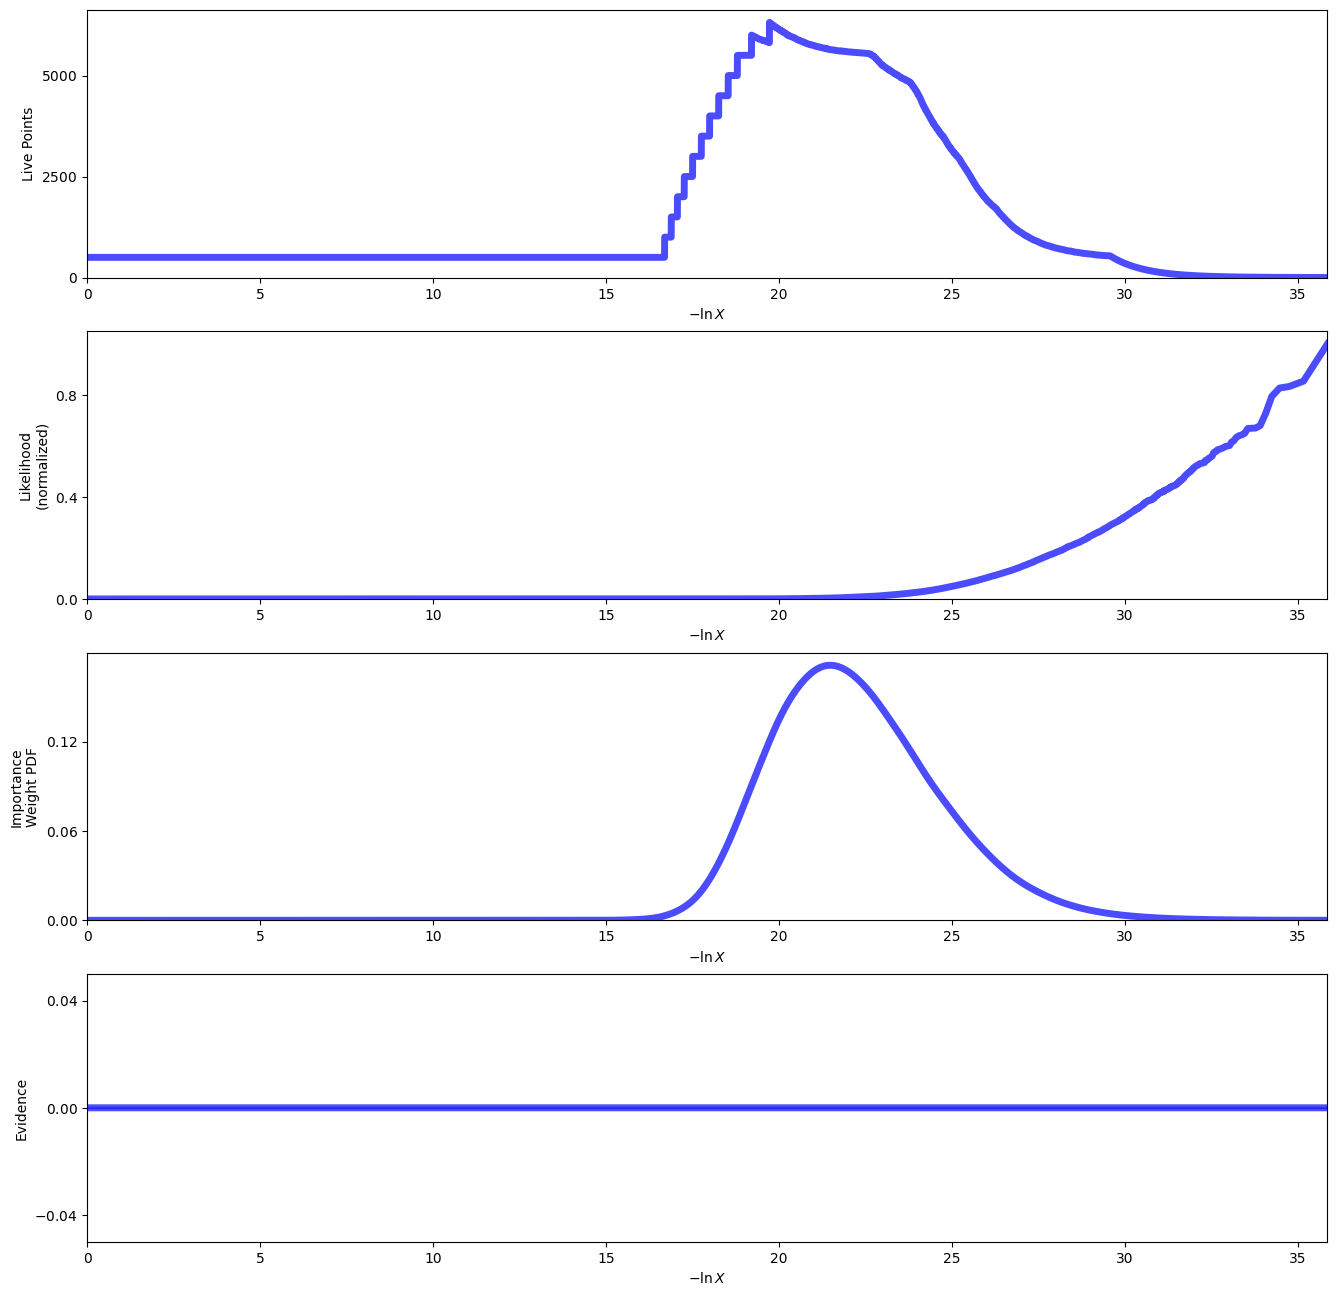

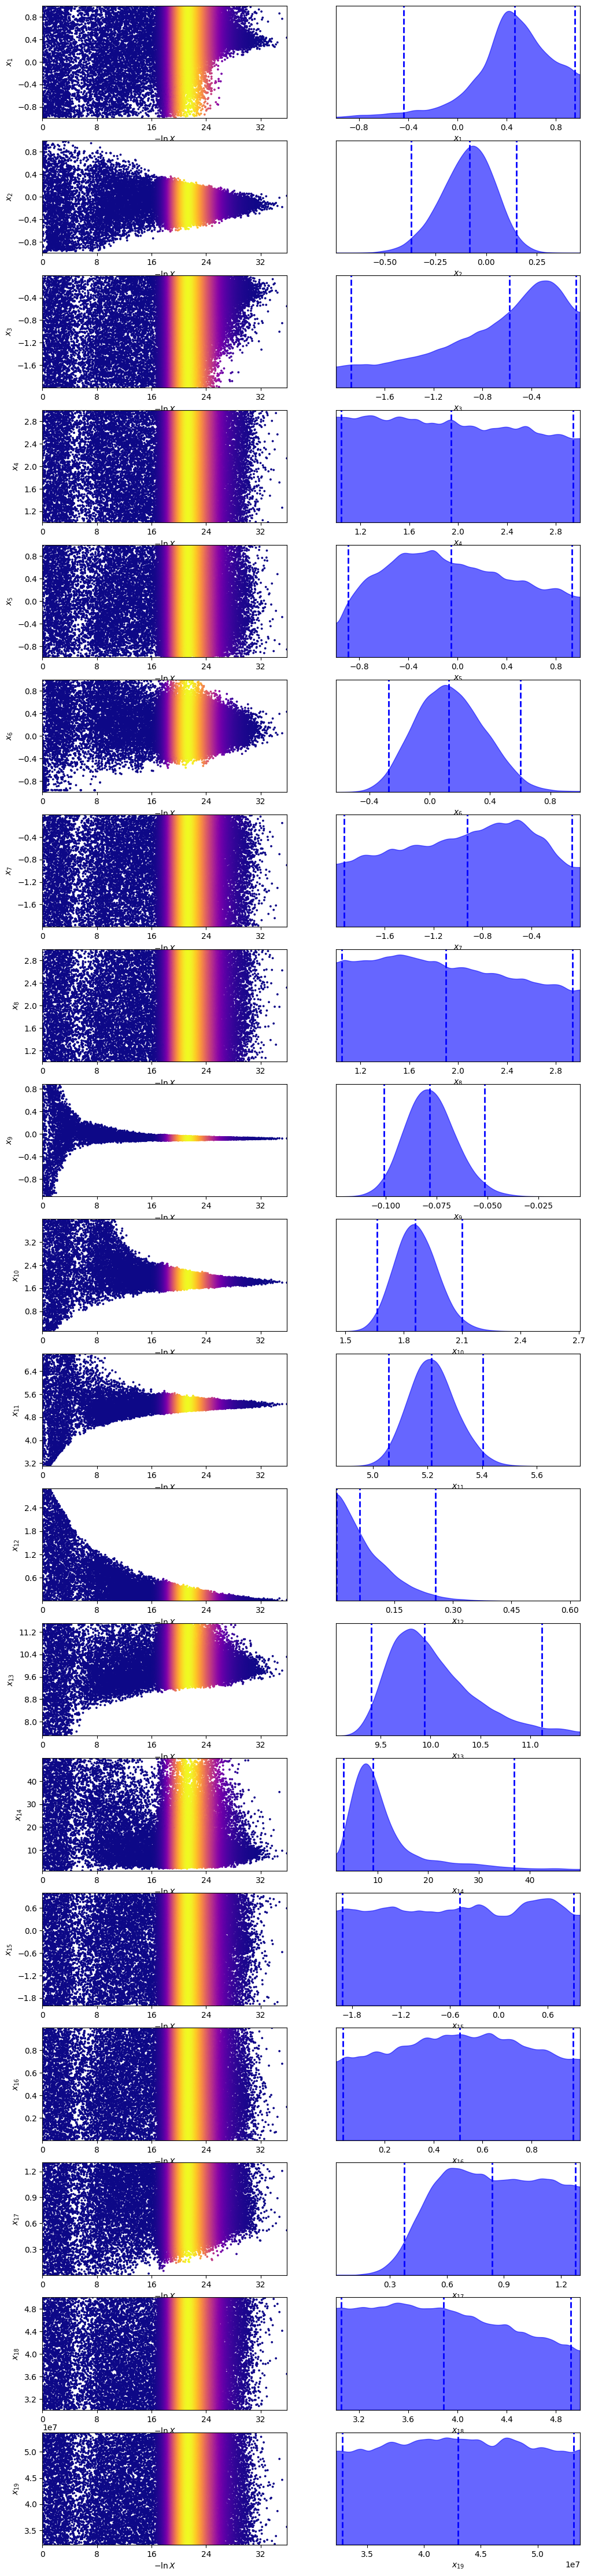

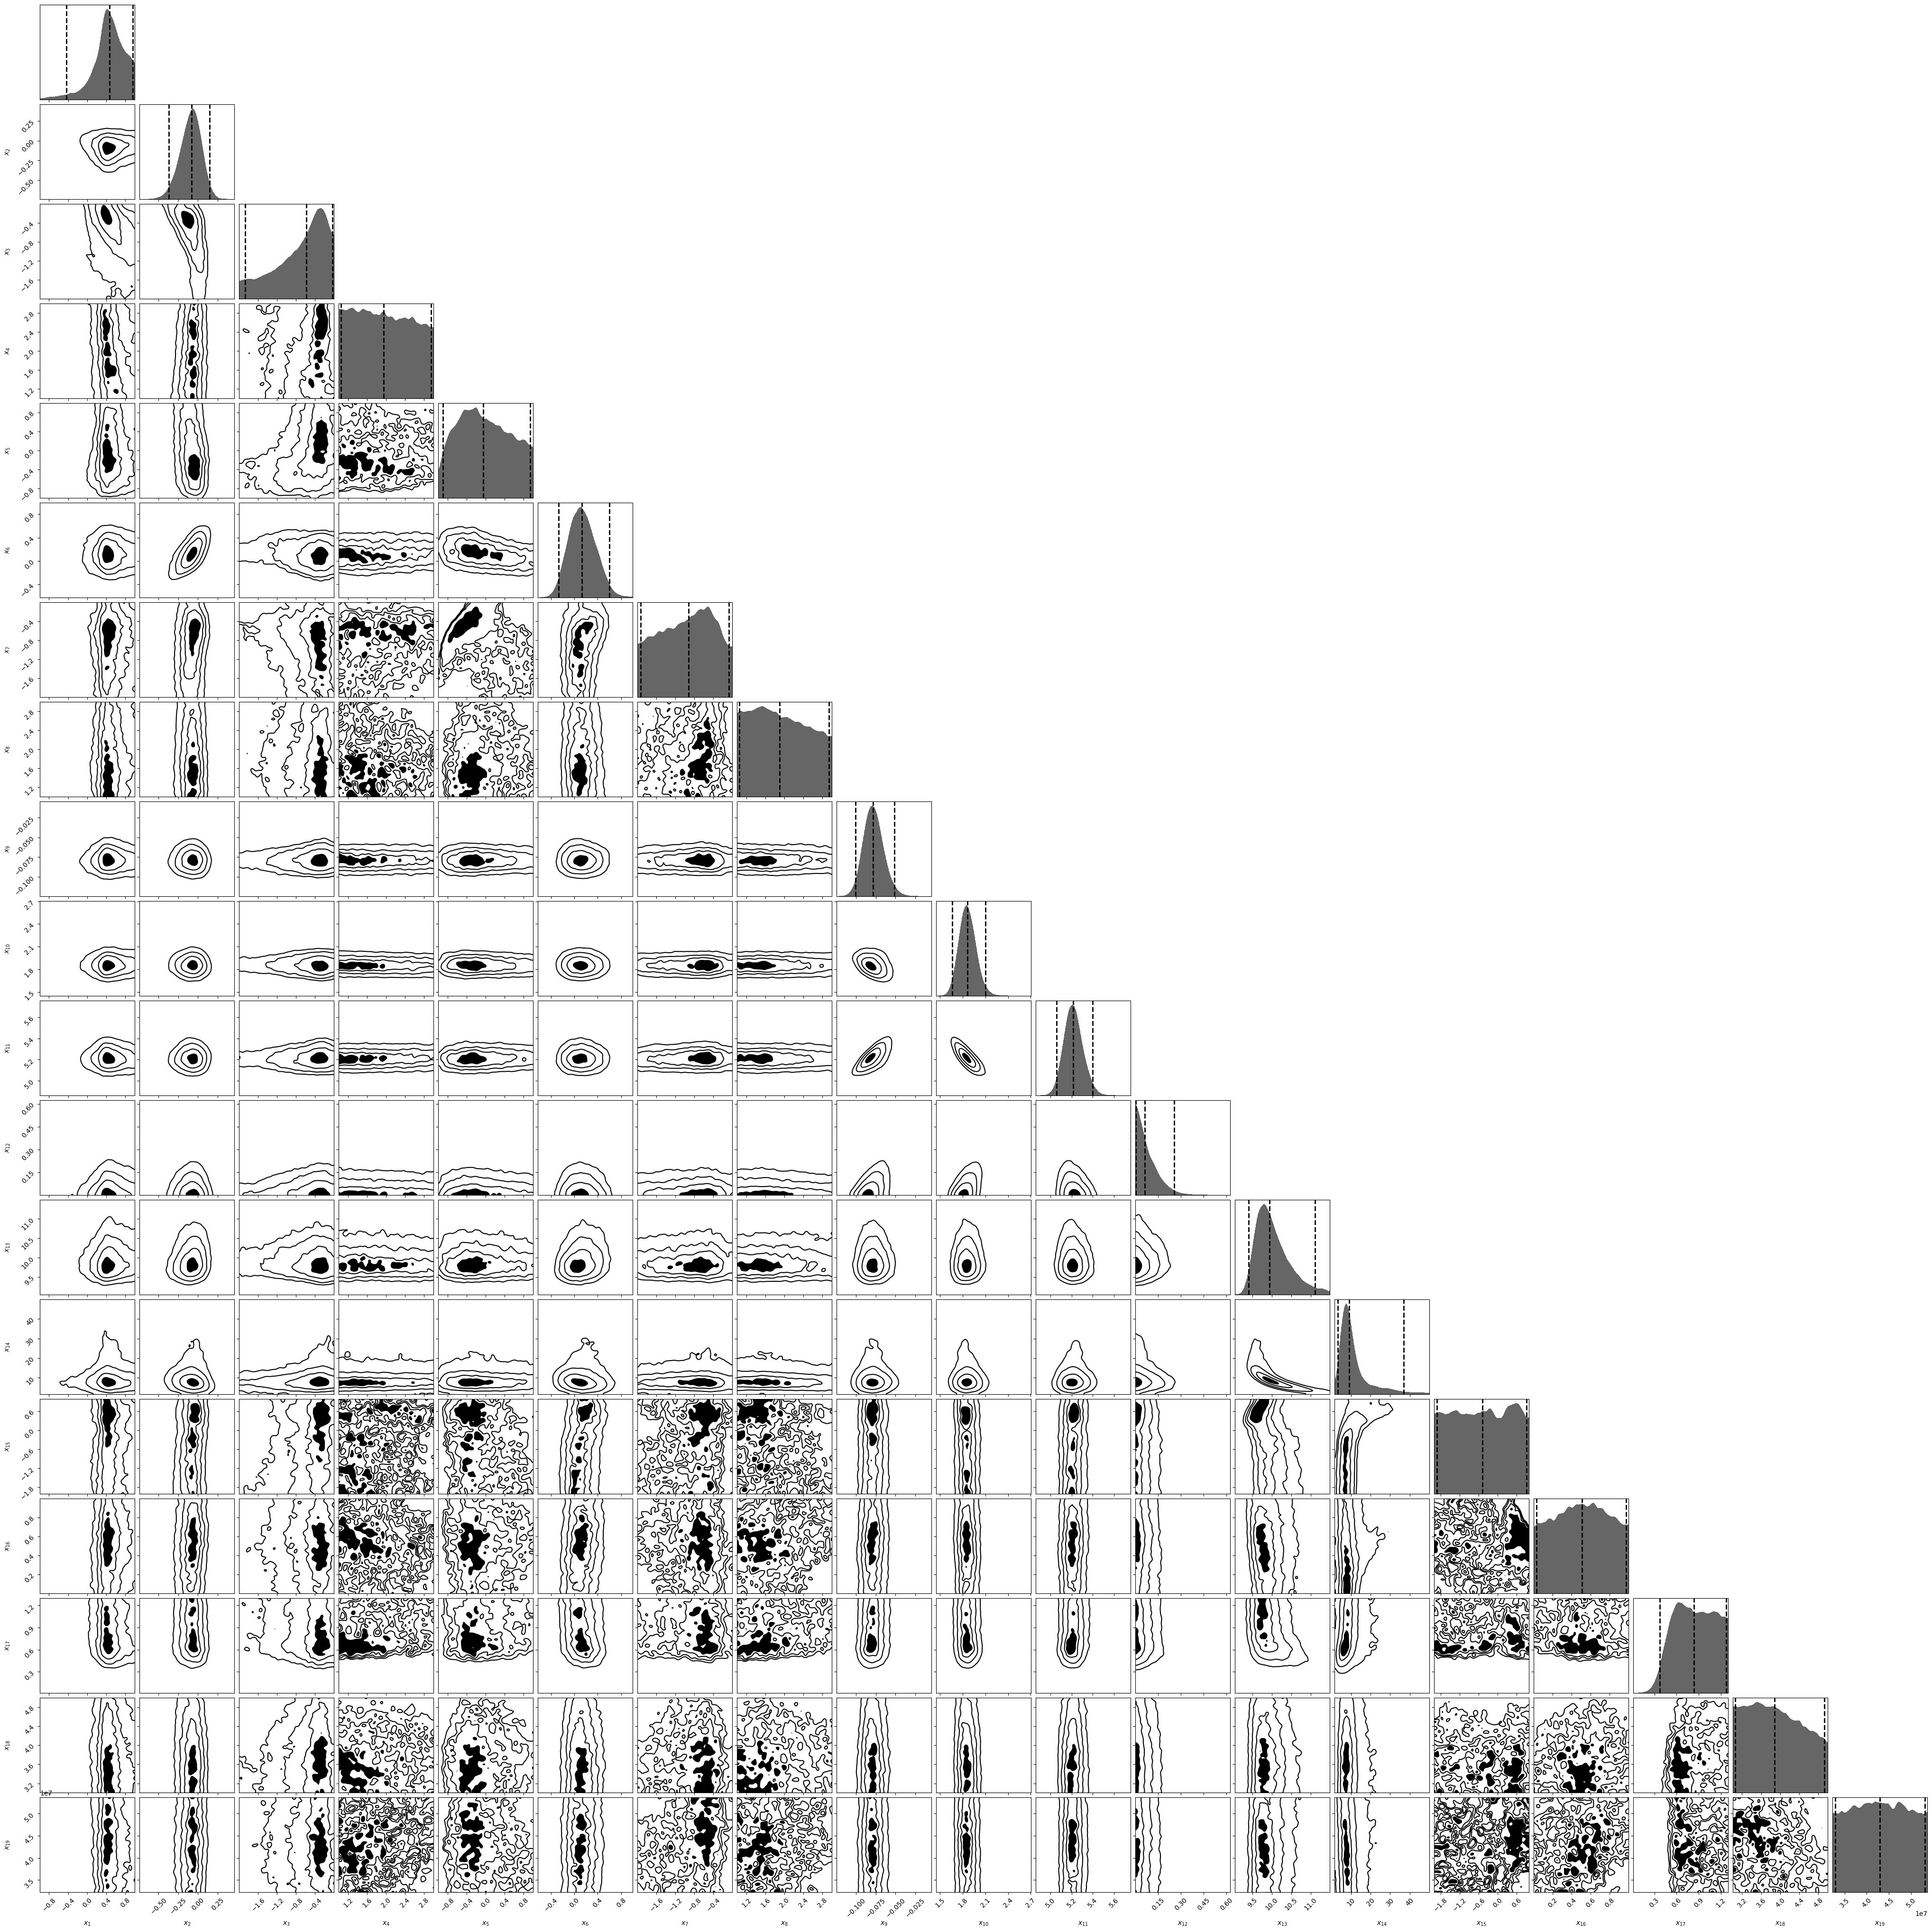

In [5]:
#diagnostic plot of the run, if the sampler has converged, the number of live points and weights should go to zero
#we can see this sampler has coverged correctly

print("number of sampling iterations = ", resu.niter)

from dynesty import plotting as dyplot

%matplotlib inline

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(resu)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(resu)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(resu
                              )
plt.show()

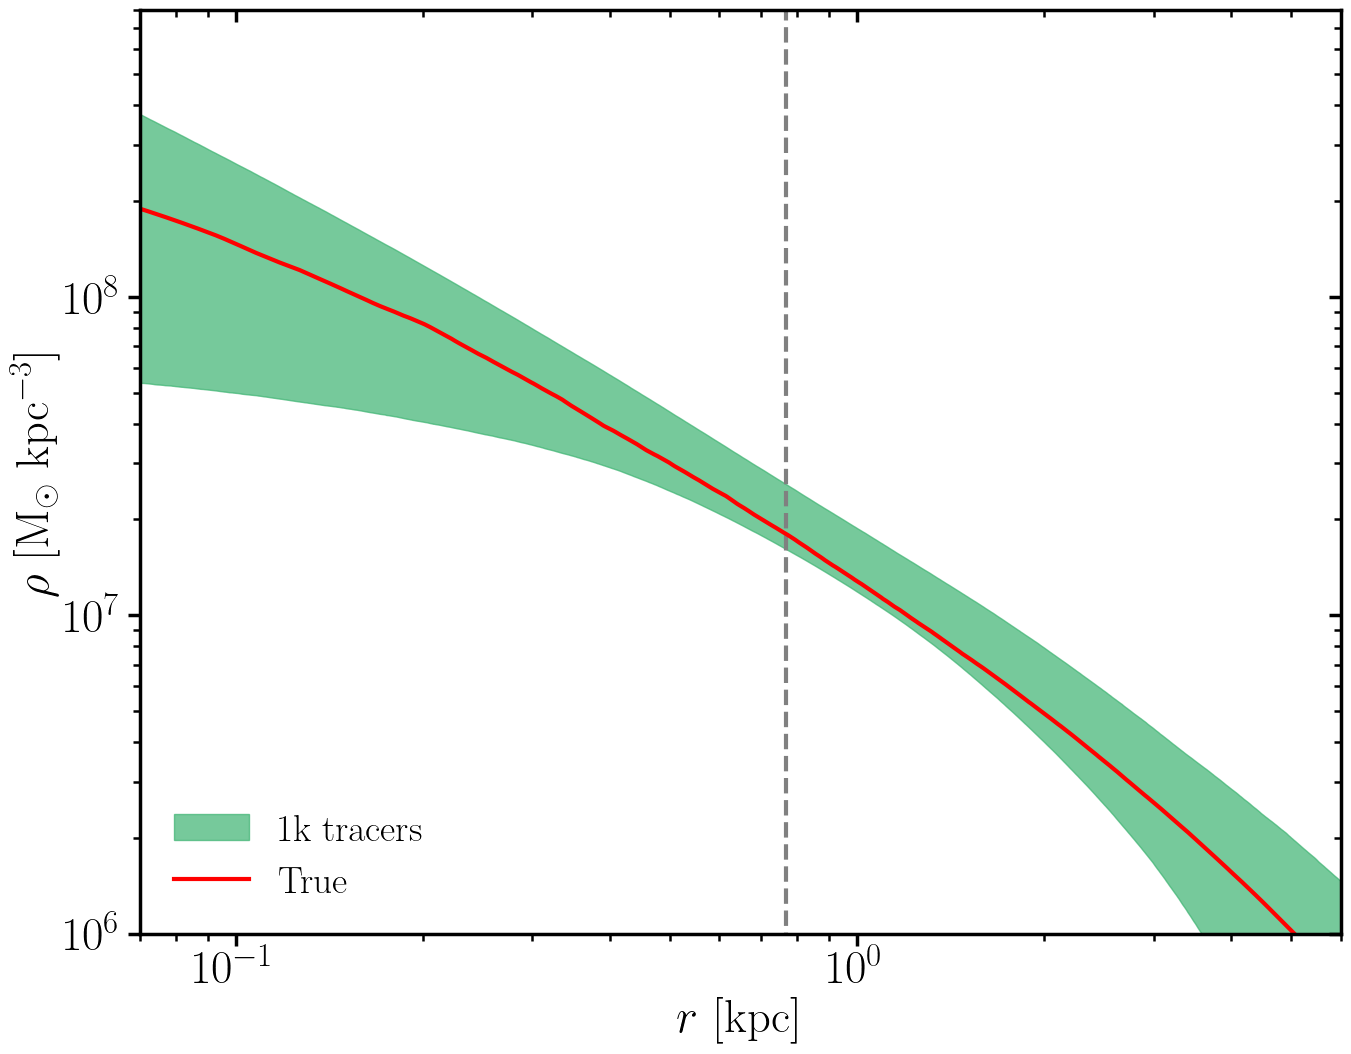

In [6]:
#DM density

xx0, fil = np.loadtxt(str(dirf + 'fornax_light_today_dm_den.txt')) #Fornax simulation true smoothened DM density

col = 'mediumseagreen'
file = 'fornax_pm_1k_chk'
al = 0.7
plt.style.use('default')
factor = 1.5
plt.rc('font', family='serif')
size=17
width=1

plt.rc('font', family='serif')
size=17
width=1
mylinewidth = 3
fontsize_title = 26

fontsize_labels = 26

fontsize_ticks = 24

fact = 1.3

fsl = fontsize_labels*1.3

fst = fontsize_title*1.3

from matplotlib import rc
rc('axes', linewidth=width)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', weight='bold')

fig, ax = plt.subplots(figsize=(15.5,12))

Ra = np.logspace(np.log10(6.5e-2), np.log10(7.01), 1000)

plt.plot(np.ones(1000) * Rhalf, np.linspace(0.9e6, 9e8, 1000), '--', color = 'gray', linewidth = 3.0, zorder = 0)

leg = r'1k tracers'


flat = resu.samples_equal()

upacs = np.zeros((len(flat), len(Ra)))
for k in range(len(flat)):

        theta = np.copy(flat[k])
        
        for i in logthis:
        
                theta[i] = 10.0**theta[i]

        Mppars = theta[-7:-1]

        upacs[k, :] = corenfw_tides_den(Ra, *Mppars)

sbets = np.zeros((7, len(Ra)))

for i in range(len(Ra)):

    sorb = np.sort(upacs[:, i])

    sbets[0, i] = sorb[int(len(flat) * 0.0275)]
    sbets[1, i] = sorb[int(len(flat) * 0.16)]
    sbets[2, i] = sorb[int(len(flat) * 0.84)]
    sbets[3, i] = sorb[int(len(flat) * 0.975)]
    sbets[4, i] = sorb[int(len(flat) * (0.5 - 0.9973/2))]
    sbets[5, i] = sorb[int(len(flat) *(0.5 + 0.9973/2))]
    sbets[6, i] = sorb[int(len(flat) *(0.5))]


        
plt.fill_between(Ra, sbets[0,:],  sbets[3,:], color = col, alpha = al, label = leg, zorder = -1)


plt.xscale('log')
plt.yscale('log')


plt.xlabel(r'$r$ [kpc]', fontsize = fsl)
plt.ylabel(r'$\rho$ [M$_{\odot}$ kpc$^{-3}$]', fontsize = fsl)


##
ax.set_xscale("log")
ax.set_yscale("log")
plt.xticks(fontsize = fst)
plt.yticks(fontsize = fst)
ax.tick_params('both', length=8.5, width=2.5, which='major', direction="out")
ax.tick_params('both', length=5, width=1.8, which='minor', direction="out")
axx = ax.secondary_yaxis("right");
axy = ax.secondary_xaxis("top");
axx.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
axx.tick_params('both', length=5, width=1.8, which='minor', direction="in")
axy.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
axy.tick_params('both', length=5, width=1.8, which='minor', direction="in")
labelleft=False
#plt.legend(fontsize = size*0.7, ncol = 2, frameon=False)
#plt.title(r"rc-mc", fontsize = size)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)
##

plt.plot(xx0, fil, color = 'red', linewidth = 3.0, label = r'True')


plt.ylim(1e6, 8e8)
plt.xlim(7e-2, 6.01)
plt.legend(frameon = False, fontsize = fsl*0.8, loc = 'lower left')


plt.savefig(str(diro + 'Plots/den_fornax_pm100_example.pdf'))
plt.show()

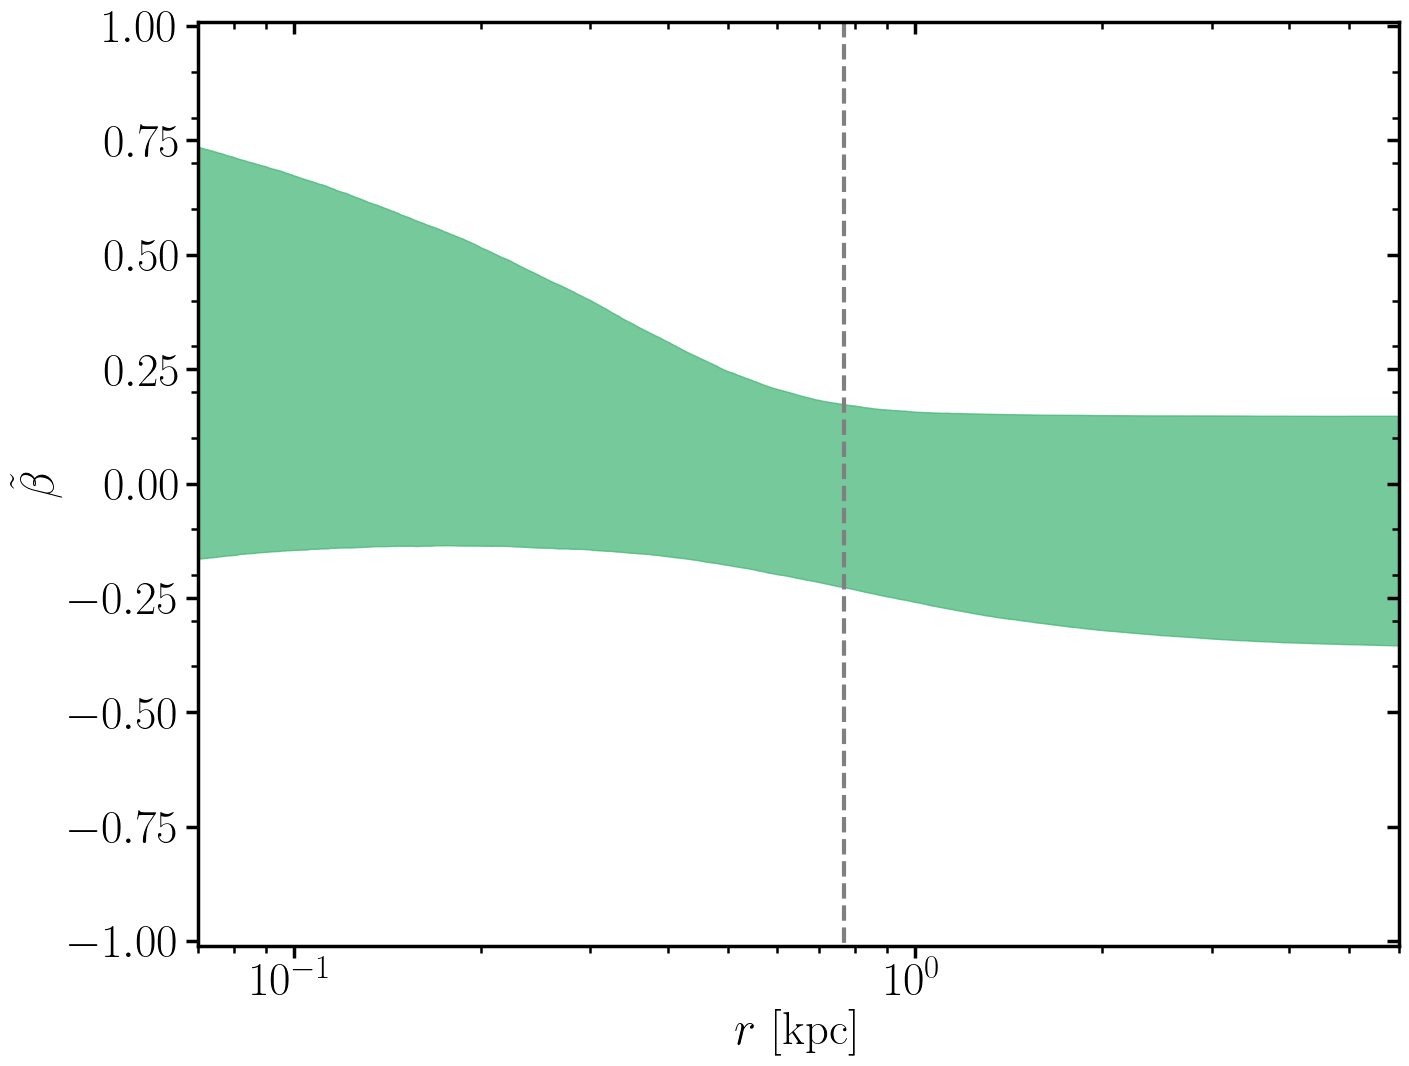

In [7]:
#symmetrized anisotropy

plt.rc('font', family='serif')
size=17
width=1

plt.rc('font', family='serif')
size=17
width=1
mylinewidth = 3
fontsize_title = 26

fontsize_labels = 26

fontsize_ticks = 24

fact = 1.3

fsl = fontsize_labels*1.3

fst = fontsize_title*1.3

from matplotlib import rc
rc('axes', linewidth=width)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', weight='bold')


coldm = 'mediumseagreen'

fig, ax = plt.subplots(figsize=(15.5,12))


plt.plot(np.ones(1000) * Rhalf, np.linspace(-1.1, 1.1, 1000), '--', color = 'gray', linewidth = 3.0, zorder = 0)

flat = resu.samples_equal()
upacs = np.zeros((len(flat), len(Ra)))
for k in range(len(flat)):

        theta = np.copy(flat[k])
        
        theta[0]= 2.0*theta[0]/(1 + theta[0])
        
        theta[1] = 2.0*theta[1]/(1 + theta[1])
        
        theta[4]= 2.0*theta[4]/(1 + theta[4])
        
        theta[5] = 2.0*theta[5]/(1 + theta[5])
        
        for i in logthis:
        
                theta[i] = 10.0**theta[i]
        
        Mppars = theta[:4]
        
        be = beta(Ra, Mppars)
        upacs[k, :] =  be / (2 - be)
        
        bets = np.zeros((6, len(Ra)))
        
for i in range(len(Ra)):

    sorb = np.sort(upacs[:, i])

    bets[0, i] = sorb[int(len(flat) * 0.0275)]
    bets[1, i] = sorb[int(len(flat) * 0.16)]
    bets[2, i] = sorb[int(len(flat) * 0.84)]
    bets[3, i] = sorb[int(len(flat) * 0.975)]
    bets[4, i] = sorb[int(len(flat) * (0.5 - 0.9973/2))]
    bets[5, i] = sorb[int(len(flat) *(0.5 + 0.9973/2))]

        
        
plt.fill_between(Ra, bets[0,:],  bets[3,:], color = col, alpha = al, zorder = -1)


plt.xscale('log')
#plt.yscale('log')



plt.xlabel(r'$r$ [kpc]', fontsize = fsl)
plt.ylabel(r'$\tilde{\beta}$', fontsize = fsl)
#plt.title(r'PlumCuspOM ($\sim 1,000$ tracers + PMs)')


##
ax.set_xscale("log")
#ax.set_yscale("log")
plt.xticks(fontsize = fst)
plt.yticks(fontsize = fst)
ax.tick_params('both', length=8.5, width=2.5, which='major', direction="out")
ax.tick_params('both', length=5, width=1.8, which='minor', direction="out")
axx = ax.secondary_yaxis("right");
axy = ax.secondary_xaxis("top");
axx.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
axx.tick_params('both', length=5, width=1.8, which='minor', direction="in")
axy.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
axy.tick_params('both', length=5, width=1.8, which='minor', direction="in")
labelleft=False
#plt.legend(fontsize = size*0.7, ncol = 2, frameon=False)
#plt.title(r"rc-mc", fontsize = size)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)
##

#plt.show()
plt.yticks(np.arange(-0.5, 1.1, 0.1), minor = True, fontsize = fst)
axx.set_yticks(np.arange(-0.5, 1.1, 0.1), minor = True)
plt.xscale('log')
plt.ylim(-1.01, 1.01)
plt.xlim(7e-2, 6.01)

plt.savefig(str(diro + 'Plots/ani_fornax_pm100_example.pdf'))
plt.show()

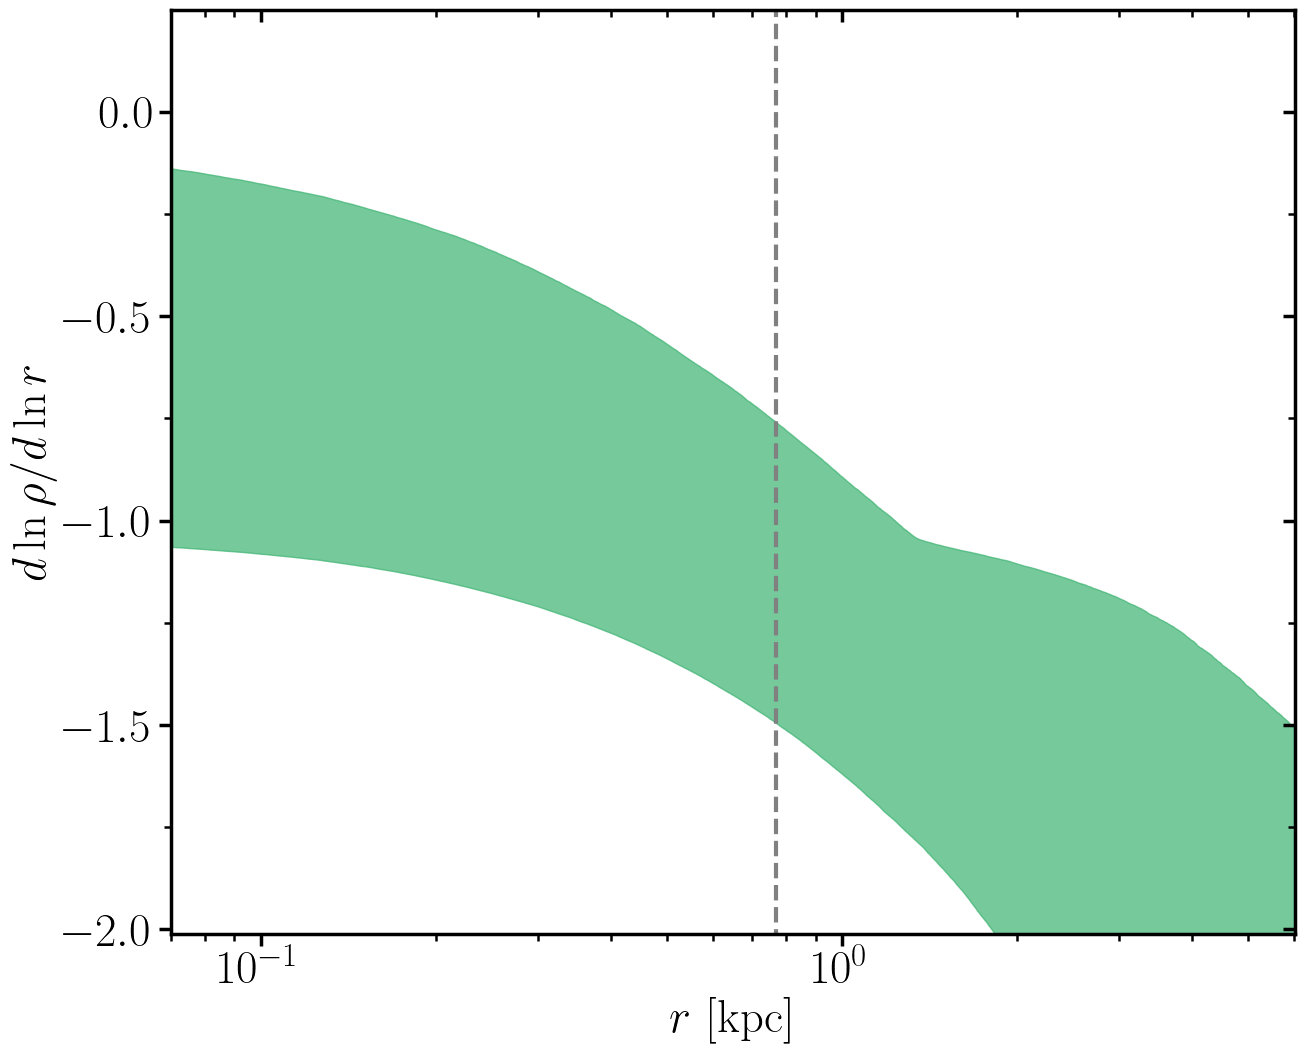

In [9]:
#slope profiles

plt.style.use('default')
factor = 1.5
#[Note: if you encounter an error, ensure the Latex package is installed in your computer
#(or erase the line below)]
#pl.rc('text', usetex=True)
plt.rc('font', family='serif')
size=17
width=1

plt.rc('font', family='serif')
size=17
width=1
mylinewidth = 3
fontsize_title = 26

fontsize_labels = 26

fontsize_ticks = 24

fact = 1.3

fsl = fontsize_labels*1.3

fst = fontsize_title*1.3

from matplotlib import rc
rc('axes', linewidth=width)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', weight='bold')


fig, ax = plt.subplots(figsize=(14.5,12))

plt.plot(np.ones(1000) * Rhalf, np.linspace(-4, 0.5, 1000), '--', color = 'gray', linewidth = 3.0, zorder = 0)

flat = resu.samples_equal()

upacs = np.zeros((len(flat), len(Ra)))

for k in range(len(flat)):

        theta = np.copy(flat[k])
        
        for i in logthis:
        
                theta[i] = 10.0**theta[i]

        Mppars = theta[-7:-1]

        upacs[k, :] = corenfw_tides_dlnrhodlnr(Ra,*Mppars, dx = 1e-5)

sbets = np.zeros((6, len(Ra)))

for i in range(len(Ra)):

    sorb = np.sort(upacs[:, i])

    sbets[0, i] = sorb[int(len(flat) * 0.0275)]
    sbets[1, i] = sorb[int(len(flat) * 0.16)]
    sbets[2, i] = sorb[int(len(flat) * 0.84)]
    sbets[3, i] = sorb[int(len(flat) * 0.975)]
    sbets[4, i] = sorb[int(len(flat) * (0.5 - 0.9973/2))]
    sbets[5, i] = sorb[int(len(flat) *(0.5 + 0.9973/2))]
    
plt.fill_between(Ra, sbets[0,:],  sbets[3,:], color = col, alpha = al, label = leg, zorder = -1)

plt.xscale('log')

plt.xlabel(r'$r$ [kpc]', fontsize = fsl)
plt.ylabel(r'${d \ln \rho} / {d \ln r}$', fontsize = fsl)


##
ax.set_xscale("log")
plt.xticks(fontsize = fst)
plt.yticks(fontsize = fst)
ax.tick_params('both', length=8.5, width=2.5, which='major', direction="out")
ax.tick_params('both', length=5, width=1.8, which='minor', direction="out")
axx = ax.secondary_yaxis("right");
axy = ax.secondary_xaxis("top");
axx.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
axx.tick_params('both', length=5, width=1.8, which='minor', direction="in")
axy.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
axy.tick_params('both', length=5, width=1.8, which='minor', direction="in")
labelleft=False
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)

plt.yticks(np.arange(-3.0, 0.25, 0.25), minor = True, fontsize = fst)
axx.set_yticks(np.arange(-3.0, 0.25, 0.25), minor = True)
plt.xscale('log')
plt.ylim(-2.01, 0.25)
plt.xlim(7e-2, 6.01)
plt.savefig(str(diro + 'Plots/slope_fornax_pm100_example.pdf'))
plt.show()

In [11]:
#projected dispersion and kurtosis profiles (this takes a little longer and will be stored in files)

ls = 10**3 #number of random samples, increasing it will make the bounds appear smoother (less random noise)

flat = resu.samples_equal()
upacsl = np.zeros((ls, len(Ra)))
upacsr = np.zeros((ls, len(Ra)))
upacst = np.zeros((ls, len(Ra)))
upacslk = np.zeros((ls, len(Ra)))
upacsrk = np.zeros((ls, len(Ra)))
upacstk = np.zeros((ls, len(Ra)))

for it in range(ls):

        k = np.random.randint(len(flat))

        theta = np.copy(flat[k])


        #converts symmetrised to normal anisotropy (both 2nd + 4th order counterpart)
        theta[0]= 2.0*theta[0]/(1 + theta[0])
    
        theta[1] = 2.0*theta[1]/(1 + theta[1])
    
        theta[4]= 2.0*theta[4]/(1 + theta[4])
    
        theta[5] = 2.0*theta[5]/(1 + theta[5])
        
        for i in logthis: #exponentiate log-variables from sampling
            
            theta[i] = 10**theta[i]
    
    
        surc = theta[2*n_betpars: 2*n_betpars+nu_components] #photometric parameters
    
    
        #defines tracer densities and stellar if present mass
    
        if individual == True:
    
            surc = np.append(np.array([1.0]), surc)
    
        rhobs = alpbetgamden(nu_rad, *surc)
        
        sobs = alpbetgamsurf(nu_rad, *surc, bar_pnts)
            
        def baranr(r): #tracer 3D density
            
            surf = np.interp(r,nu_rad,rhobs,right = 1e-30)
            
            return surf
        
        def barsurf(r): #tracer 2D density
            
            surf = np.interp(r,nu_rad,sobs,right = 1e-30)
            
            return surf
    
        
        #total mass of alpha-beta-gamma profile
        rho0, r0, alp, bet, gam = surc
        normmass = 12.566370614359172 * rho0 * ((1/r0)**alp)**((-3 + gam)/alp) *  (1/r0)**(-gam) \
        * gamma((bet - gam)/alp + (-3 + gam)/alp) * gamma((3 - gam)/alp) \
    /(gamma((bet - gam)/alp) * alp)
    
    
        if Mstar > 0.0:
    
                def maser(r, mst): #stellar profile 3D mass (assumes mass follows light)
    
                     return alpbetgammass(r,*surc) * mst / normmass
    
                Mpars = theta[2*n_betpars+nu_components:2*n_betpars+nu_components+7] #mass model parameters
        
                def M(r, Mparsu): #mass profile with stellar component
                
                    Mpars = np.copy(Mparsu)
            
                    M200, c, rc, n, rt, delta, Mst = Mpars #coreNFWtides params. + stellar mass
            
                    return  corenfw_tides_mass(r,M200,c,rc,n,rt,delta) + maser(r, Mst)
    
        else:
    
                Mpars = theta[2*n_betpars+nu_components:2*n_betpars+nu_components+6] #mass model parameters
    
                def M(r, Mparsu):  #mass profile without stellar component
                    
                        Mpars = np.copy(Mparsu)
                
                        M200, c, rc, n, rt, delta = Mpars #coreNFWtides params.
                
                        return  corenfw_tides_mass(r,M200,c,rc,n,rt,delta)
    
        betpars, betppars = theta[:4], theta[4:8]

        nu, Sigfunc,M,beta,betaf,Mpars,\
         betpars, betppars, rmin,rmax = baranr,barsurf,M,beta,betaf, Mpars,\
         betpars, betppars, rmin, rmax

        Sigout, pmt2, pmr2, los2, ktt, krt, klt, neg = sigp_prop_k(np.array([1.0]),Ra,Ra,nu,Sigfunc,M,beta,betaf,Mpars,\
                      betpars, betppars, rmin,rmax, nonn = rcn)

        
        upacsl[it, :], upacst[it, :], upacsr[it, :] = los2**0.5/1e3, pmt2**0.5/1e3, pmr2**0.5/1e3

        upacslk[it, :], upacstk[it, :], upacsrk[it, :] = klt, ktt, krt


kd = ['sl', 'st', 'sr', 'kl', 'kt', 'kr']

us = [upacsl, upacst, upacsr, upacslk, upacstk, upacsrk]

for name, upac in zip(kd, us):

        sbets = np.zeros((6, len(Ra)))
        
        for i in range(len(Ra)):
        
            sorb = np.sort(upac[:, i])
        
            sbets[0, i] = sorb[int(ls * 0.0275)]
            sbets[1, i] = sorb[int(ls * 0.16)]
            sbets[2, i] = sorb[int(ls * 0.84)]
            sbets[3, i] = sorb[int(ls * 0.975)]
            sbets[4, i] = sorb[int(ls * (0.5 - 0.9973/2))]
            sbets[5, i] = sorb[int(ls *(0.5 + 0.9973/2))]
        
        np.savetxt(str(diro + file + '_' + name + '.txt'), sbets)

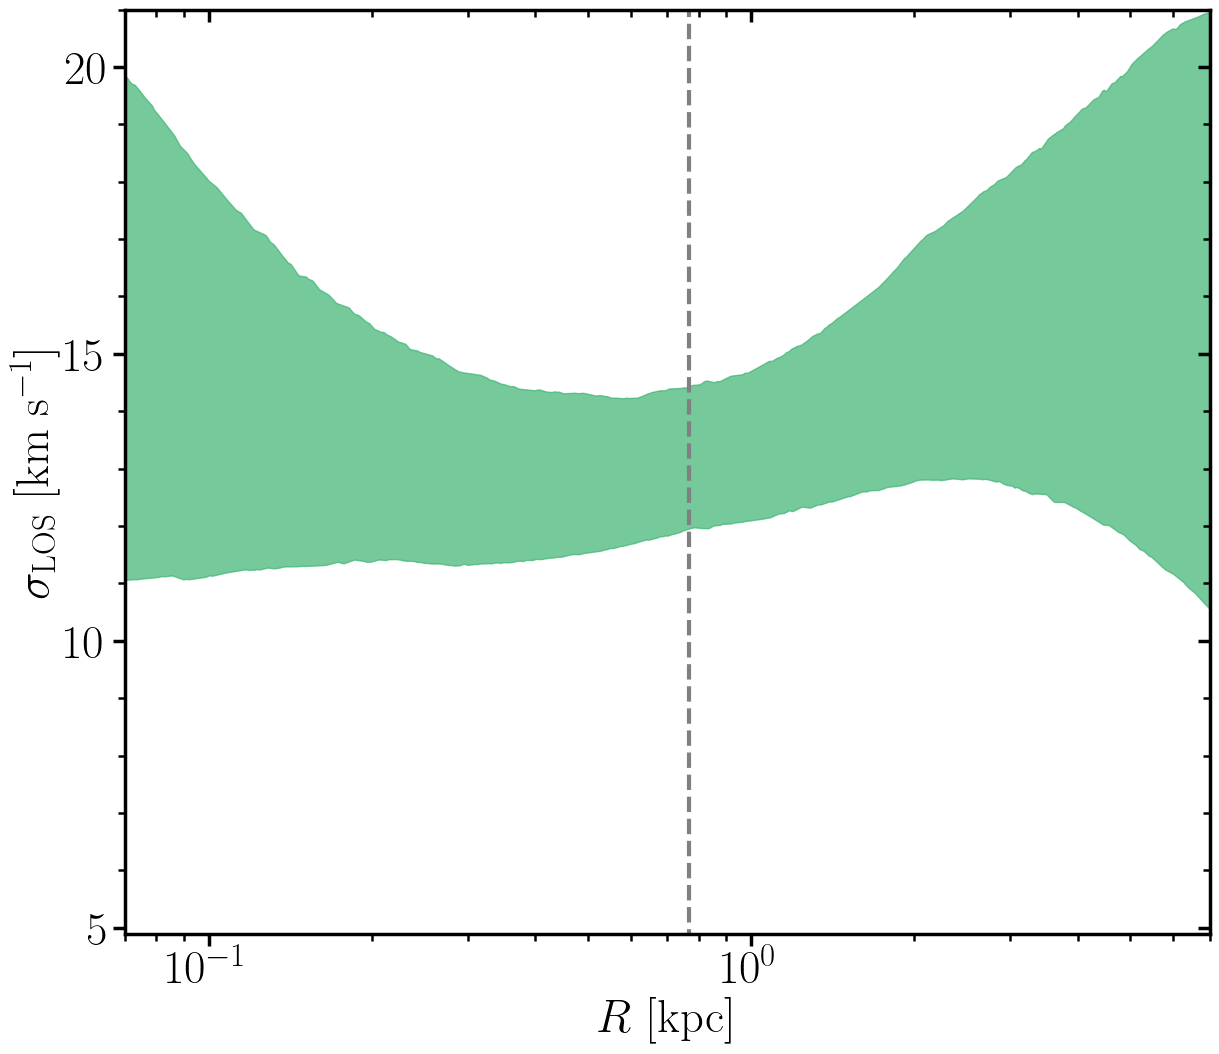

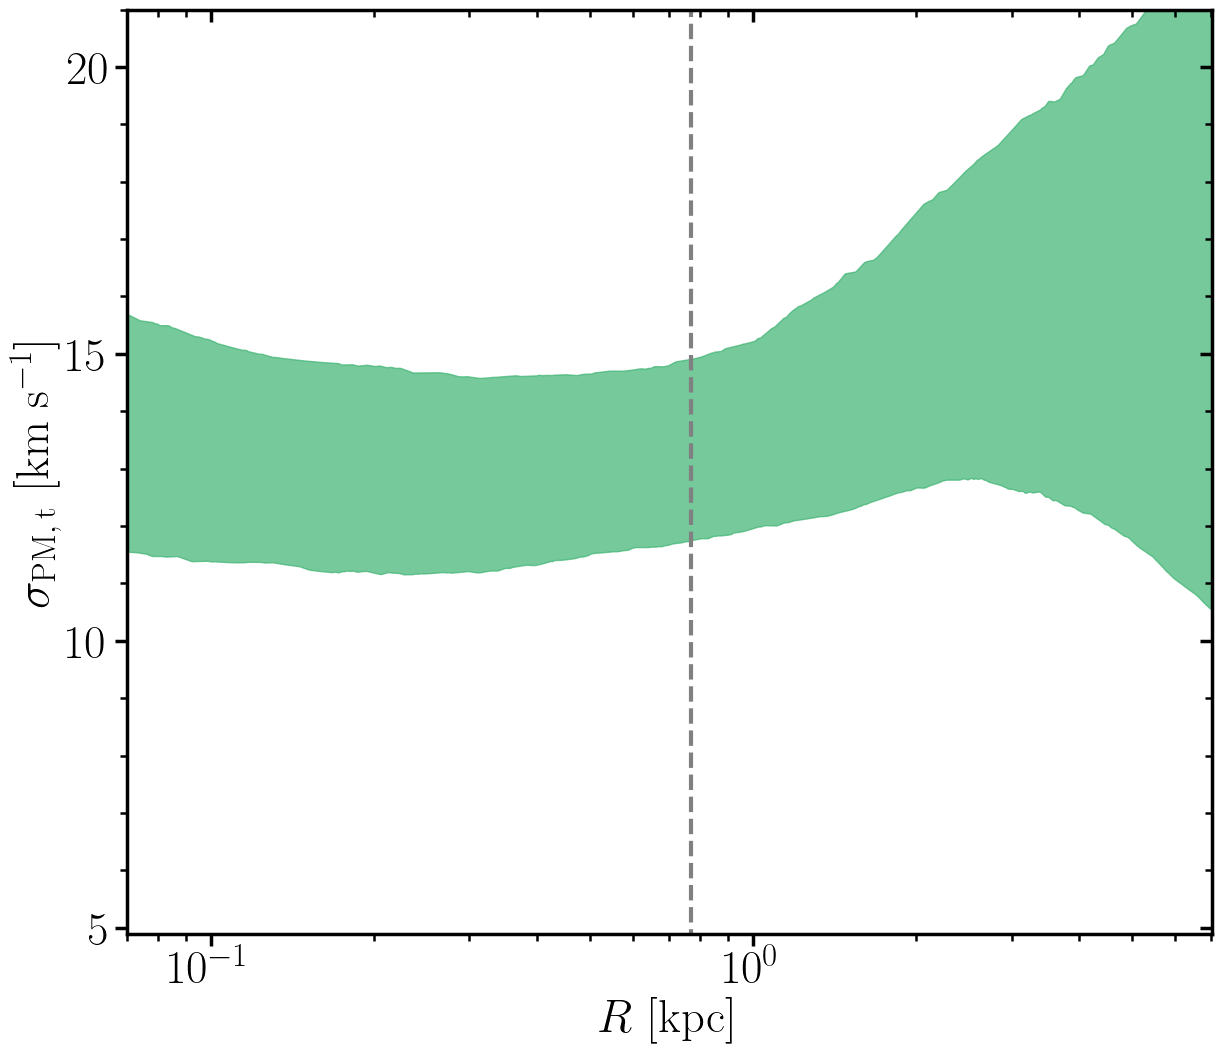

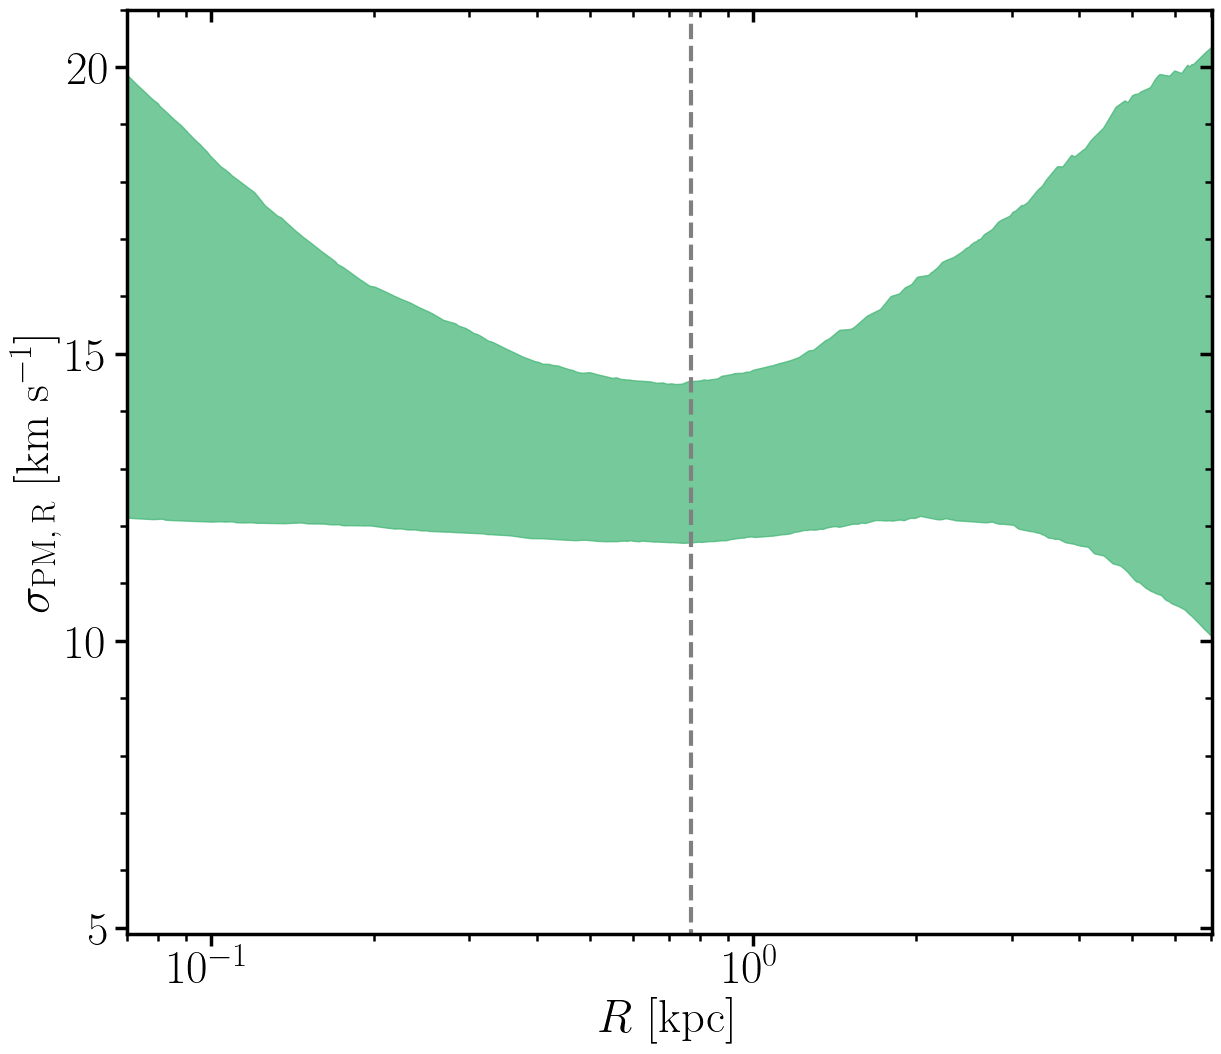

In [13]:
kd = ['sl', 'st', 'sr', 'kl', 'kt', 'kr'] 
labs = [r'$\sigma_{\rm LOS}$ [km s$^{-1}$]', r'$\sigma_{\rm PM, \: t}$ [km s$^{-1}$]', r'$\sigma_{\rm PM, \: R}$ [km s$^{-1}$]']

for name, la in zip(kd, labs):

        plt.style.use('default')
        factor = 1.5
        #[Note: if you encounter an error, ensure the Latex package is installed in your computer
        #(or erase the line below)]
        #pl.rc('text', usetex=True)
        plt.rc('font', family='serif')
        size=17
        width=1
        
        plt.rc('font', family='serif')
        size=17
        width=1
        mylinewidth = 3
        fontsize_title = 26
        
        fontsize_labels = 26
        
        fontsize_ticks = 24
        
        fact = 1.3
        
        fsl = fontsize_labels*1.3
        
        fst = fontsize_title*1.3
        
        
        from matplotlib import rc
        rc('axes', linewidth=width)
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
        rc('text', usetex=True)
        rc('font', weight='bold')
        
        coldm = 'mediumseagreen'
        
        fig, ax = plt.subplots(figsize=(14,12))
    
        plt.plot(np.ones(1000) * Rhalf, np.linspace(0, 45, 1000), '--', color = 'gray', linewidth = 3.0, zorder = 0)
        
        bets = np.loadtxt(str(diro + file + '_' + name + '.txt'))
    
        plt.fill_between(Ra, bets[0,:],  bets[3,:], color = col, alpha = al, zorder = -1)
        
        plt.xscale('log')

        plt.xlabel(r'$R$ [kpc]', fontsize = fsl)
        plt.ylabel(la, fontsize = fsl)
        
        
        ##
        ax.set_xscale("log")
        plt.xticks(fontsize = fst)
        plt.yticks(fontsize = fst)
        ax.tick_params('both', length=8.5, width=2.5, which='major', direction="out")
        ax.tick_params('both', length=5, width=1.8, which='minor', direction="out")
        axx = ax.secondary_yaxis("right");
        axy = ax.secondary_xaxis("top");
        axx.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
        axx.tick_params('both', length=5, width=1.8, which='minor', direction="in")
        axy.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
        axy.tick_params('both', length=5, width=1.8, which='minor', direction="in")
        labelleft=False
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(2.5)
     
        plt.xscale('log')
     
        plt.yticks(np.arange(5.0, 26, 1), minor = True, fontsize = fst)
        axx.set_yticks(np.arange(5.0, 26, 1), minor = True)

        plt.yticks(np.arange(5.0, 22, 5),fontsize = fst)
        axx.set_yticks(np.arange(5.0, 26, 5))

        plt.ylim(4.9, 21)
        plt.xlim(7e-2, 7.01)
        plt.savefig(str(diro + 'Plots/' + name +'_fornax_pm100_example.pdf'))
        plt.show()

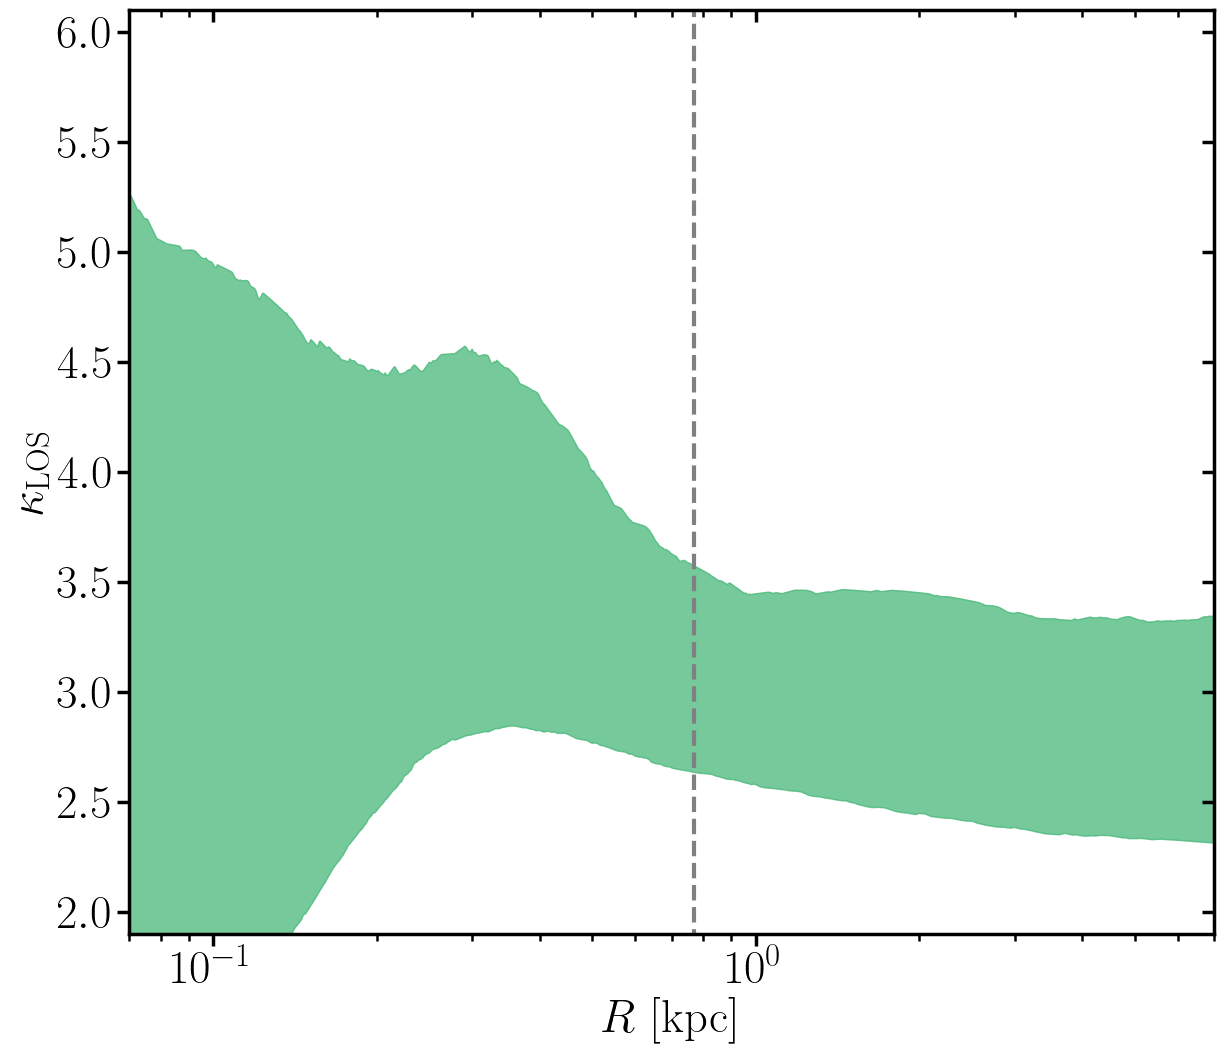

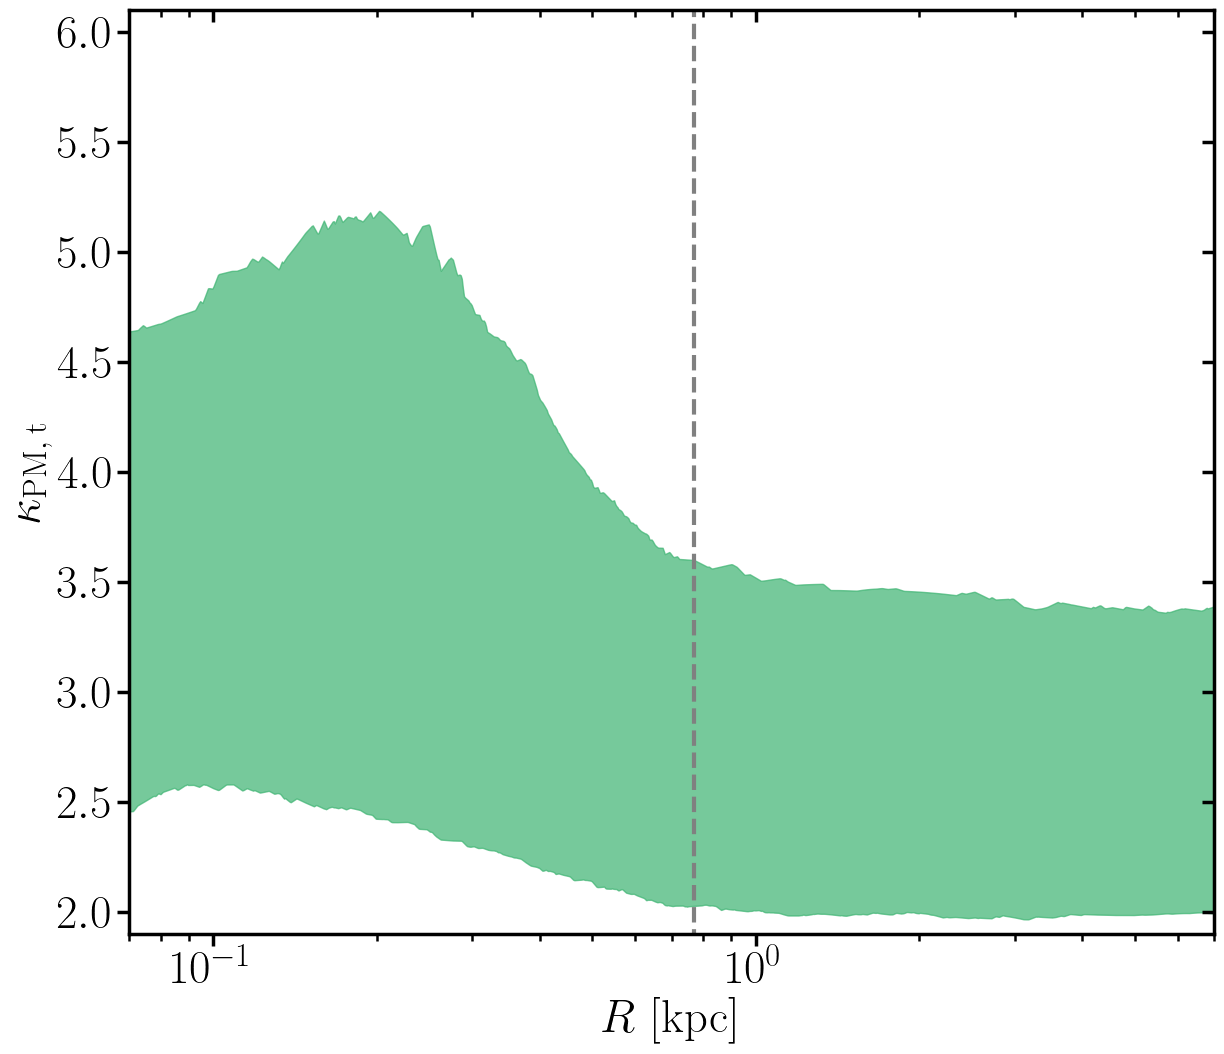

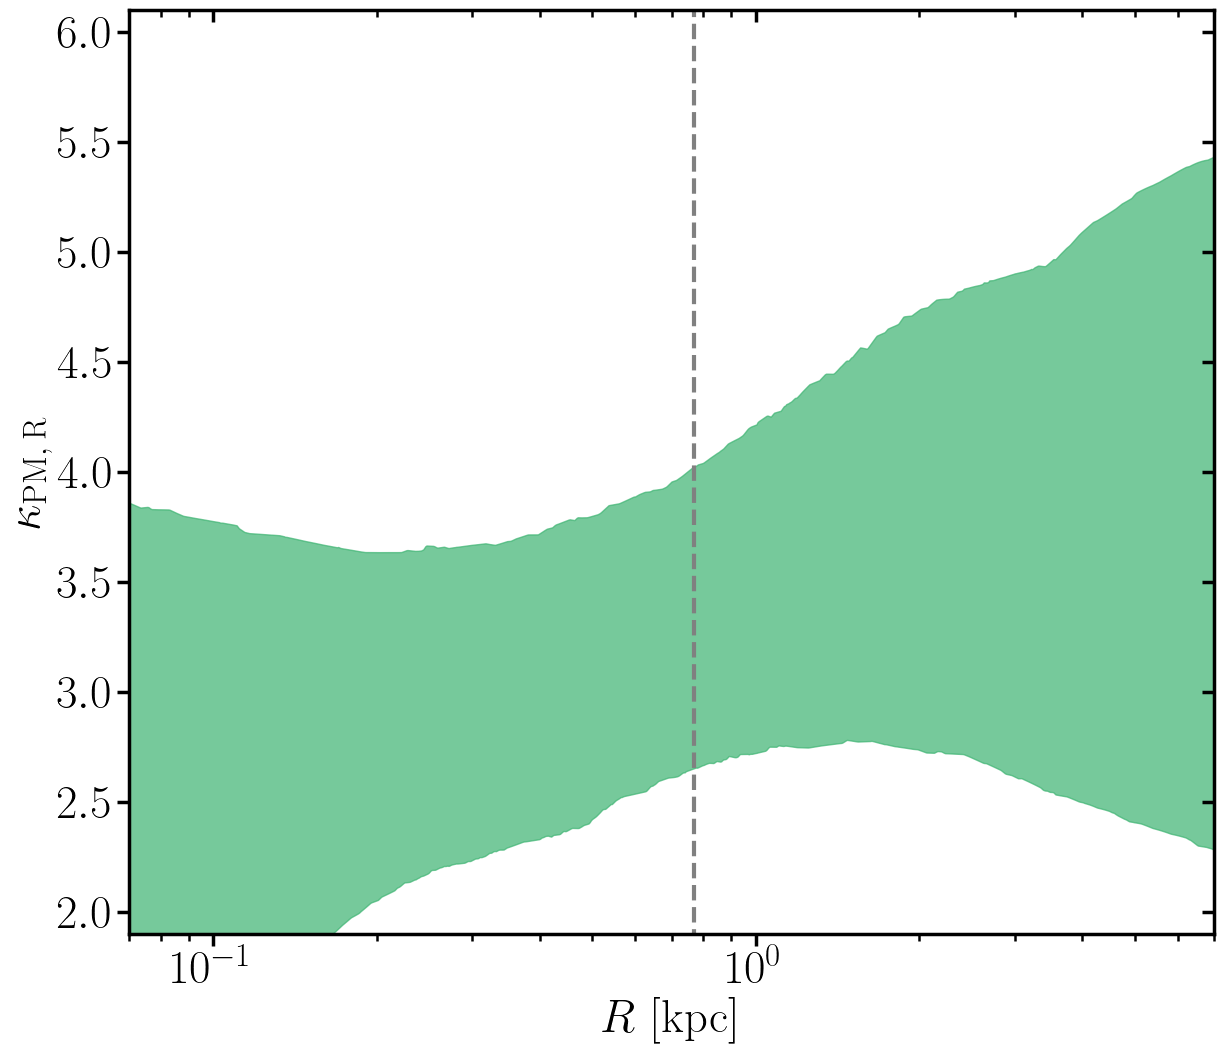

In [14]:
kd = ['kl', 'kt', 'kr'] 
labs = [r'$\kappa_{\rm LOS}$ ', r'$\kappa_{\rm PM, \: t}$ ', r'$\kappa_{\rm PM, \: R}$ ']

for name, la in zip(kd, labs):

        plt.style.use('default')
        factor = 1.5
        #[Note: if you encounter an error, ensure the Latex package is installed in your computer
        #(or erase the line below)]
        #pl.rc('text', usetex=True)
        plt.rc('font', family='serif')
        size=17
        width=1
        
        plt.rc('font', family='serif')
        size=17
        width=1
        mylinewidth = 3
        fontsize_title = 26
        
        fontsize_labels = 26
        
        fontsize_ticks = 24
        
        fact = 1.3
        
        fsl = fontsize_labels*1.3
        
        fst = fontsize_title*1.3
        
        from matplotlib import rc
        rc('axes', linewidth=width)
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
        rc('text', usetex=True)
        rc('font', weight='bold')
        
        coldm = 'mediumseagreen'
    
        fig, ax = plt.subplots(figsize=(14,12))
        
        plt.plot(np.ones(1000) * Rhalf, np.linspace(1.0, 7, 1000), '--', color = 'gray', linewidth = 3.0, zorder = 0)
                
        bets = np.loadtxt(str(diro + file + '_' + name + '.txt'))
                
        plt.fill_between(Ra, bets[0,:],  bets[3,:], color = col, alpha = al, zorder = -1)
        
        plt.xscale('log')
        plt.xlabel(r'$R$ [kpc]', fontsize = fsl)
        plt.ylabel(la, fontsize = fsl)        
        
        ##
        ax.set_xscale("log")
        plt.xticks(fontsize = fst)
        plt.yticks(fontsize = fst)
        ax.tick_params('both', length=8.5, width=2.5, which='major', direction="out")
        ax.tick_params('both', length=5, width=1.8, which='minor', direction="out")
        axx = ax.secondary_yaxis("right");
        axy = ax.secondary_xaxis("top");
        axx.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
        axx.tick_params('both', length=5, width=1.8, which='minor', direction="in")
        axy.tick_params('both', length=8.5, width=2.5, which='major', direction="in", labelright=False, labeltop=False)
        axy.tick_params('both', length=5, width=1.8, which='minor', direction="in")
        labelleft=False
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(2.5)
        plt.xscale('log')

        plt.ylim(1.9, 6.1)
        plt.xlim(7e-2, 7.01)
        plt.savefig(str(diro + 'Plots/' + name +'_fornax_pm100_example.pdf'))
        plt.show()